In [ ]:
#!pip install MeCab
#!pip install ipykernel
#!pip install mecab-python-windows --user

In [ ]:
!dir

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
with open('./in/sample.txt',) as f:
    print(len([r for r in f.read().split('\n') if r is not '']))

4


In [2]:
with open('./in/sample.txt',) as f:
    print([r.replace('\t', ' ') for r in f.read().split('\n') if r is not ''])

['このパーソナルデータリファレンスアーキテクチャ(設計)書(以下\u3000本書)は、パーソナルデータを扱う全ての事業者、ステークホルダが、ビジネスモデルや内部統制などのシステム設計を行うためのガイドとなる設計書である。', '本書の示す手順により、各事業者が自らの事業のアーキテクチャを設計・整理することで、パーソナルデータの取り扱いの適正性や潜在する課題を顕在化し、適切なパーソナルデータの利活用モデルが構築されることを期待している。', '加えて、本書は、特定の事業分野、事業内容に限定することなく、パーソナルデータを取り扱う事業の共通要件を示している。このため、異分野の事業であっても、本書に従って設計される共用のアーキテクチャを持つことにより、異分野間でのデータ共有を推進する一助となることも期待されている。', '僕は走る。']


In [6]:
import MeCab
t = MeCab.Tagger()
#with open('./in/neko.txt', encoding=) as f:
with open('./in/sample.txt') as f:
    text = f.read()
    
#with open('./in/sample.txt.mecab', mode='w') as f:
with open('./in/sample.txt.mecab', mode='w') as f:
    f.write(t.parse(text))

In [7]:
with open('./in/sample.txt') as f:
    obj = f.read()

rows =[row.split('\t')[0] for row in obj.split('\n') if not row =='']
c_dic= {}
for k in set(rows):
    c_dic[k] = rows.count(k)
sorted(c_dic.items(), key=lambda x: -x[1])

[('僕は走る。', 1),
 ('本書の示す手順により、各事業者が自らの事業のアーキテクチャを設計・整理することで、パーソナルデータの取り扱いの適正性や潜在する課題を顕在化し、適切なパーソナルデータの利活用モデルが構築されることを期待している。',
  1),
 ('加えて、本書は、特定の事業分野、事業内容に限定することなく、パーソナルデータを取り扱う事業の共通要件を示している。このため、異分野の事業であっても、本書に従って設計される共用のアーキテクチャを持つことにより、異分野間でのデータ共有を推進する一助となることも期待されている。',
  1),
 ('このパーソナルデータリファレンスアーキテクチャ(設計)書(以下\u3000本書)は、パーソナルデータを扱う全ての事業者、ステークホルダが、ビジネスモデルや内部統制などのシステム設計を行うためのガイドとなる設計書である。',
  1)]

In [ ]:
base_list = []
count_dic = {}
for s in doc:
    for t in s:
        base_list.append(t['base'])
for word in set(base_list):
    count_dic[word] = base_list.count(word)
sorted(count_dic.items(), key=lambda x: -x[1])

In [9]:
d = {}

doc = []

with open("./in/sample.txt.mecab") as f:
    lines = f.readlines()
    sentense = []
    for line in lines:
        line = line[:-1]
        if line == "EOS":
            if len(sentense) > 0:
                doc.append(sentense)
            sentense = []
            continue

        surface, rest = line.split("\t")
        rest = rest.split(",")

        assert len(rest) >= 6
        pos, pos1, base = rest[0], rest[1], rest[6]

        key = (surface, base, pos, pos1)
        d[key] = surface
        sentense.append(key)

for s in doc[:20]:
    # print(s)
    # wakachi for readability
    print(" ".join(map(lambda x: x[0], s)))

この パーソナルデータリファレンスアーキテクチャ ( 設計 ) 書 ( 以下 　 本書 ) は 、 パーソナル データ を 扱う 全て の 事業 者 、 ステークホルダ が 、 ビジネス モデル や 内部 統制 など の システム 設計 を 行う ため の ガイド と なる 設計 書 で ある 。 本書 の 示す 手順 により 、 各 事業 者 が 自ら の 事業 の アーキテクチャ を 設計 ・ 整理 する こと で 、 パーソナル データ の 取り扱い の 適正 性 や 潜在 する 課題 を 顕在 化 し 、 適切 な パーソナル データ の 利 活用 モデル が 構築 さ れる こと を 期待 し て いる 。 加え て 、 本書 は 、 特定 の 事業 分野 、 事業 内容 に 限定 する こと なく 、 パーソナル データ を 取り扱う 事業 の 共通 要件 を 示し て いる 。 この ため 、 異 分野 の 事業 で あっ て も 、 本書 に従って 設計 さ れる 共用 の アーキテクチャ を 持つ こと により 、 異 分野 間 で の データ 共有 を 推進 する 一助 と なる こと も 期待 さ れ て いる 。 僕 は 走る 。


In [10]:
doc

[[('この', 'この', '連体詞', '*'),
  ('パーソナルデータリファレンスアーキテクチャ', '*', '名詞', '一般'),
  ('(', '*', '名詞', 'サ変接続'),
  ('設計', '設計', '名詞', 'サ変接続'),
  (')', '*', '名詞', 'サ変接続'),
  ('書', '書', '名詞', '接尾'),
  ('(', '*', '名詞', 'サ変接続'),
  ('以下', '以下', '名詞', '非自立'),
  ('\u3000', '\u3000', '記号', '空白'),
  ('本書', '本書', '名詞', '一般'),
  (')', '*', '名詞', 'サ変接続'),
  ('は', 'は', '助詞', '係助詞'),
  ('、', '、', '記号', '読点'),
  ('パーソナル', 'パーソナル', '名詞', '一般'),
  ('データ', 'データ', '名詞', '一般'),
  ('を', 'を', '助詞', '格助詞'),
  ('扱う', '扱う', '動詞', '自立'),
  ('全て', '全て', '名詞', '副詞可能'),
  ('の', 'の', '助詞', '連体化'),
  ('事業', '事業', '名詞', '一般'),
  ('者', '者', '名詞', '接尾'),
  ('、', '、', '記号', '読点'),
  ('ステークホルダ', '*', '名詞', '一般'),
  ('が', 'が', '助詞', '格助詞'),
  ('、', '、', '記号', '読点'),
  ('ビジネス', 'ビジネス', '名詞', '一般'),
  ('モデル', 'モデル', '名詞', '一般'),
  ('や', 'や', '助詞', '並立助詞'),
  ('内部', '内部', '名詞', '一般'),
  ('統制', '統制', '名詞', 'サ変接続'),
  ('など', 'など', '助詞', '副助詞'),
  ('の', 'の', '助詞', '連体化'),
  ('システム', 'システム', '名詞', '一般'),
  ('設計', '設計', '名詞', 'サ変接続'),
  ('を

In [14]:
import MeCab
fname = 'in/sample.txt'
fname_parsed = 'in/sample.txt.mecab'


def parse_neko():
    '''「吾輩は猫である」を形態素解析
    「吾輩は猫である」(neko.txt)を形態素解析してneko.txt.mecabに保存する
    '''

    with open(fname) as data_file, \
            open(fname_parsed, mode='w') as out_file:

        mecab = MeCab.Tagger()
        out_file.write(mecab.parse(data_file.read()))


def neco_lines():
    '''「吾輩は猫である」の形態素解析結果のジェネレータ
    「吾輩は猫である」の形態素解析結果を順次読み込んで、各形態素を
    ・表層形（surface）
    ・基本形（base）
    ・品詞（pos）
    ・品詞細分類1（pos1）
    の4つをキーとする辞書に格納し、1文ずつ、この辞書のリストとして返す

    戻り値：
    1文の各形態素を辞書化したリスト
    '''
    with open(fname_parsed) as file_parsed:

        morphemes = []
        for line in file_parsed:

            # 表層形はtab区切り、それ以外は','区切りでバラす
            cols = line.split('\t')
            if(len(cols) < 2):
                raise StopIteration     # 区切りがなければ終了
            res_cols = cols[1].split(',')

            # 辞書作成、リストに追加
            morpheme = {
                'surface': cols[0],
                'base': res_cols[6],
                'pos': res_cols[0],
                'pos1': res_cols[1]
            }
            morphemes.append(morpheme)

            # 品詞細分類1が'句点'なら文の終わりと判定
            if res_cols[1] == '句点':
                yield morphemes
                morphemes = []


# 形態素解析
parse_neko()

# 1文ずつ辞書のリストを作成
lines = neco_lines()
for line in lines:
    print(line)

[{'surface': 'この', 'base': 'この', 'pos': '連体詞', 'pos1': '*'}, {'surface': 'パーソナルデータリファレンスアーキテクチャ', 'base': '*\n', 'pos': '名詞', 'pos1': '一般'}, {'surface': '(', 'base': '*\n', 'pos': '名詞', 'pos1': 'サ変接続'}, {'surface': '設計', 'base': '設計', 'pos': '名詞', 'pos1': 'サ変接続'}, {'surface': ')', 'base': '*\n', 'pos': '名詞', 'pos1': 'サ変接続'}, {'surface': '書', 'base': '書', 'pos': '名詞', 'pos1': '接尾'}, {'surface': '(', 'base': '*\n', 'pos': '名詞', 'pos1': 'サ変接続'}, {'surface': '以下', 'base': '以下', 'pos': '名詞', 'pos1': '非自立'}, {'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}, {'surface': '本書', 'base': '本書', 'pos': '名詞', 'pos1': '一般'}, {'surface': ')', 'base': '*\n', 'pos': '名詞', 'pos1': 'サ変接続'}, {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}, {'surface': '、', 'base': '、', 'pos': '記号', 'pos1': '読点'}, {'surface': 'パーソナル', 'base': 'パーソナル', 'pos': '名詞', 'pos1': '一般'}, {'surface': 'データ', 'base': 'データ', 'pos': '名詞', 'pos1': '一般'}, {'surface': 'を', 'base': 'を', 'pos': '助詞', 'pos1': '格助詞'}

C:\Users\mkiyota1\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: DeprecationWarning: generator 'neco_lines' raised StopIteration


単語の抽出とカウント

In [18]:
import MeCab
from collections import Counter
fname = 'in/sample.txt'
fname_parsed = 'in/sample.txt.mecab'

def parse_neko():
    '''「吾輩は猫である」を形態素解析
    「吾輩は猫である」(neko.txt)を形態素解析してneko.txt.mecabに保存する
    '''

    with open(fname) as data_file, \
            open(fname_parsed, mode='w') as out_file:

        mecab = MeCab.Tagger()
        out_file.write(mecab.parse(data_file.read()))


def neco_lines():
    '''「吾輩は猫である」の形態素解析結果のジェネレータ
    「吾輩は猫である」の形態素解析結果を順次読み込んで、各形態素を
    ・表層形（surface）
    ・基本形（base）
    ・品詞（pos）
    ・品詞細分類1（pos1）
    の4つをキーとする辞書に格納し、1文ずつ、この辞書のリストとして返す

    戻り値：
    1文の各形態素を辞書化したリスト
    '''
    with open(fname_parsed) as file_parsed:

        morphemes = []
        for line in file_parsed:

            # 表層形はtab区切り、それ以外は','区切りでバラす
            cols = line.split('\t')
            if(len(cols) < 2):
                raise StopIteration     # 区切りがなければ終了
            res_cols = cols[1].split(',')

            # 辞書作成、リストに追加
            morpheme = {
                'surface': cols[0],
                'base': res_cols[6],
                'pos': res_cols[0],
                'pos1': res_cols[1]
            }
            morphemes.append(morpheme)

            # 品詞細分類1が'句点'なら文の終わりと判定
            if res_cols[1] == '句点':
                yield morphemes
                morphemes = []


# 形態素解析
parse_neko()

# Counterオブジェクトに単語をセット
word_counter = Counter()
for line in neco_lines():
    word_counter.update([morpheme['surface'] for morpheme in line])

# 出現頻度順のリストを取得
list_word = word_counter.most_common()
print(list_word)

[('の', 14), ('、', 13), ('を', 9), ('事業', 7), ('設計', 5), ('データ', 5), ('。', 5), ('こと', 5), ('て', 5), ('本書', 4), ('パーソナル', 4), ('で', 4), ('する', 4), ('は', 3), ('が', 3), ('さ', 3), ('いる', 3), ('分野', 3), ('この', 2), ('(', 2), (')', 2), ('書', 2), ('者', 2), ('モデル', 2), ('や', 2), ('ため', 2), ('と', 2), ('なる', 2), ('により', 2), ('アーキテクチャ', 2), ('し', 2), ('れる', 2), ('期待', 2), ('異', 2), ('も', 2), ('パーソナルデータリファレンスアーキテクチャ', 1), ('以下', 1), ('\u3000', 1), ('扱う', 1), ('全て', 1), ('ステークホルダ', 1), ('ビジネス', 1), ('内部', 1), ('統制', 1), ('など', 1), ('システム', 1), ('行う', 1), ('ガイド', 1), ('ある', 1), ('示す', 1), ('手順', 1), ('各', 1), ('自ら', 1), ('・', 1), ('整理', 1), ('取り扱い', 1), ('適正', 1), ('性', 1), ('潜在', 1), ('課題', 1), ('顕在', 1), ('化', 1), ('適切', 1), ('な', 1), ('利', 1), ('活用', 1), ('構築', 1), ('加え', 1), ('特定', 1), ('内容', 1), ('に', 1), ('限定', 1), ('なく', 1), ('取り扱う', 1), ('共通', 1), ('要件', 1), ('示し', 1), ('あっ', 1), ('に従って', 1), ('共用', 1), ('持つ', 1), ('間', 1), ('共有', 1), ('推進', 1), ('一助', 1), ('れ', 1), ('僕', 1), ('走る', 1)]


C:\Users\mkiyota1\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: DeprecationWarning: generator 'neco_lines' raised StopIteration


[('の', 14), ('、', 13), ('を', 9), ('事業', 7), ('設計', 5), ('データ', 5), ('。', 5), ('こと', 5), ('て', 5), ('本書', 4)]


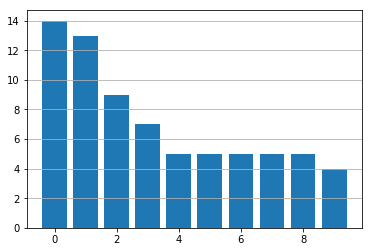

In [23]:
# 頻度上位10語の取得
size = 10
list_word = word_counter.most_common(size)
print(list_word)

# 単語（x軸用）と出現数（y軸用）のリストに分解
list_zipped = list(zip(*list_word))
words = list_zipped[0]
counts = list_zipped[1]

plt.bar(
    range(0, size),     # x軸の値（0,1,2...9）
    counts,             # それに対応するy軸の値
    align='center'      # x軸における棒グラフの表示位置
)

# グリッドを表示
plt.grid(axis='y')

# 表示
plt.show()

In [13]:
token_list

[]

In [ ]:
for s in doc:
    for t in s:
        if t['pos'] == '動詞':
            print(t['surface'])

In [ ]:
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline
n = 10
labels = [i[0] for i in sorted(count_dic.items(), key=lambda x: -x[1])[:n]]
score = [i[1] for i in sorted(count_dic.items(), key=lambda x: -x[1])[:n]]

plt.bar(labels, score)
plt.show()